## Applications of Differentiation

<p>In this independent work, you are going to implement two applications Linear Approximation and Newton's Method</p>

<p>For more information, check out the textbook. </p>


Done by Ilkhomzhon Sidikov

In [95]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sympy.abc import x
from sympy.parsing.sympy_parser import parse_expr
from matplotlib.patches import Circle
import math


## Task 1: Linear Approximation
<p>Implement a function that takes a function and a value, and returns a linear approximation of that function at that value.</p>

Enter positive value in range ( 0 -> 130) for f(x) = x**0.5 :- 80

The linear approximation of  80**0.5  is  8.94444444444444

Required True value is 8.94427190999916

The graph of Approximation:



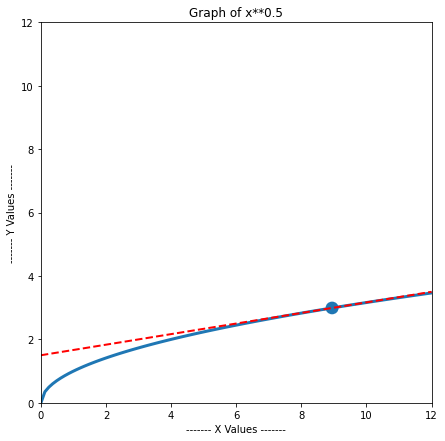

In [97]:
x = sym.symbols('x')
eqn = x**0.5                       # WORKS ONLY WITH SQUARE ROOT FUNCTION
xx0 = int(input("Enter positive value in range ( 0 -> 130) for f(x) = x**0.5 :- "))
x0 = xx0**0.5

def LinApprox(g, a):
    g = sym.sympify(g)   ##converts string into sympy object            
    f = sym.lambdify(x, g)  ##converts into function
    val_x = np.linspace(0, 12, 100)   ## x values to be plotted
   
    if 0 < xx0 <= 1.5:                 #making a list of close values
      k = 1**0.5
    elif 1.5 < xx0 <= 6:
      k = 4**0.5
    elif 6 < xx0 <= 12:
      k = 9**0.5
    elif 12 < xx0 <= 20:
      k = 16**0.5
    elif 20 < xx0 <= 30:
      k = int(25**0.5)
    elif 30 < xx0 <= 40 :
      k = 36**0.5
    elif 40 < xx0 <= 55 :
      k = 49**0.5
    elif 55 < xx0 <= 72 :
      k = 64**0.5
    elif 72 < xx0 <= 90 :
      k = 81**0.5
    elif 90 < xx0 <= 110 :
      k = 100**0.5
    elif 110 < xx0 <= 130 :
      k = 121**0.5
    elif 130 < xx0:
      print('')
      return print("  ERROR !!!  Your values reaches my limit ( 130 )")
      
      

    fig, ax = plt.subplots(figsize = (7, 7))
    ax.plot(val_x, f(val_x), linewidth = 3)   # plotting the function
    slope = sym.diff(g, x).subs(x, k)   # finding slope with k value
    
    appx_result = f(k**2) + sym.diff(g, x).subs(x, k**2) * (xx0-(k**2))  # approximating

    ax.plot(val_x, f(a) + slope * (val_x - a), 'r--', linewidth = 2)   #plotting the tangent line
    circle = Circle((a, f(a)), 0.2,)                                 #marking with the circle
    ax.add_patch(circle)
    plt.xlabel('------- X Values -------')
    plt.ylabel('------- Y Values -------')
    plt.title('Graph of x**0.5')
    
    plt.xlim(0, 12)
    plt.ylim(0, 12)
    print("")
    print("The linear approximation of " , str(xx0)+'**0.5' , " is ", appx_result) 
    print("")
    print("Required True value is", x0)
    print("")
    print("The graph of Approximation:")
    print("")
LinApprox(eqn,x0)

## Task 2: Newton's Method
<p>Implement a function that takes a differentiable function and returns any root of that function.</p>

Enter the function:- x**2-1
Enter 1st guess:- 8
Enter total number of guesses:- 10


Results:

1 - Guess ---> x == 4.0625000000

2 - Guess ---> x == 2.1543269231

3 - Guess ---> x == 1.3092545126

4 - Guess ---> x == 1.0365239732

5 - Guess ---> x == 1.0006434972

Accuracy overreached, I am Closing the program



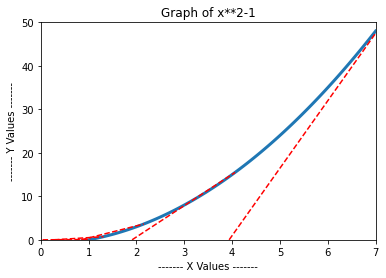

In [98]:
""" Newton's Method """
from sympy import *
x = symbols('x')

eqn = input("Enter the function:- ")
x0 = int(input("Enter 1st guess:- "))
z = int(input("Enter total number of guesses:- "))
expr =  parse_expr(eqn)
expr_prime = expr.diff(x)

def func(y):                                     #function
    return expr.subs(x,y)

def derivFunc( y ):                              #derivative of function
    return expr_prime.subs(x,y)

def newtonRaphson(s, x ):                        #newton's  methos implimentation
    print("")
    
    xv = np.linspace(start = 0, stop = 7, num = 100)    #plotting the graph
    yv = []
    for i in xv:
      yv.append(func(i))
    plt.xlabel('------- X Values -------')
    plt.ylabel('------- Y Values -------')
    plt.title('Graph of ' + eqn)
    plt.plot(xv,yv,linewidth = 3)

    print("")
    print("Results:")
    print("")
   
    for m in range(s):
        h = func(x) / derivFunc(x) 
        if (derivFunc(x) !=0 and abs(h) >= 0.001):
            plt.plot((h,x),(0,func(x)),"r--")
            x = x - h 
            print(m+1 , "- Guess ---> x == %.10f"% x  , sep=" ")
            print("")
            
        elif(abs(h) <= 0.001):
            print("Accuracy overreached, I am Closing the program !")
            print('')
            break;
        elif(derivFunc(x) ==0):
            print("Derivative is 0, devision by 0, I am Closing Program! ")
            
            break;
       
    plt.xlim(0,7)
    plt.ylim(0,50)

newtonRaphson(z,x0)